In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from xgboost import XGBClassifier
#from sklearn.cross_validation import 

In [4]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [5]:
import time

def utc2timestamp(dt):
    timeArray = time.strptime(dt, "%Y-%m-%d %H:%M:%S")

    timestamp = time.mktime(timeArray)
    return timestamp



In [6]:
train_sample = pd.read_csv('train_sample.csv')

In [20]:
train_sample.head(10)

,ip,app,device,os,channel,is_attributed,week
0,87540,12,1,13,497,0,1
1,105560,25,1,17,259,0,1
2,101424,12,1,19,212,0,1
3,94584,13,1,13,477,0,1
4,68413,12,1,1,178,0,3
5,93663,3,1,17,115,0,3
6,17059,1,1,17,135,0,3
7,121505,9,1,25,442,0,1
8,192967,2,2,22,364,0,2
9,143636,3,1,19,135,0,2


In [8]:
train_sample = train_sample.drop(['attributed_time' ] , axis = 1)

In [9]:
def time2category_year(actime):
    temp = time.strptime(actime , '%Y-%m-%d %H:%M:%S')
    return temp[0]

def time2category_month(actime):
    temp = time.strptime(actime , '%Y-%m-%d %H:%M:%S')
    return temp[1]

def time2category_day(actime):
    temp = time.strptime(actime , '%Y-%m-%d %H:%M:%S')
    return temp[2]

def time2category_hour(actime):
    temp = time.strptime(actime , '%Y-%m-%d %H:%M:%S')
    return temp[3]

def time2category_week(actime):
    temp = time.strptime(actime , '%Y-%m-%d %H:%M:%S')
    return temp[6]



#train_sample['day'] = train_sample.click_time.apply(time2category_day)
#train_sample['hour'] = train_sample.click_time.apply(time2category_hour)
train_sample['week'] = train_sample.click_time.apply(time2category_week)


In [11]:
train_sample = train_sample.drop(['click_time'] , axis = 1)

In [127]:
dd = '1970-01-01 08:00:00'
ddttime = time.strptime(dd , "%Y-%m-%d %H:%M:%S")
#ddt = time.gmtime()
#time.mktime(ddttime)
ddttime

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=8, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=-1)

In [ ]:
#=======================
#=======================

In [15]:
kf = KFold(10 , shuffle=True , random_state=1)

In [139]:
train_sample = train_sample.drop(['click_time' , 'attributed_time'] , axis = 1)
train_sample.day = train_sample.day.astype(str)
train_sample.hour = train_sample.hour.astype(str)

train_sample = pd.get_dummies(train_sample)

In [16]:
train_sample.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'is_attributed', 'week'], dtype='object')

In [17]:
nb = RandomForestClassifier(n_estimators=50)
#nb = XGBClassifier()

features = list(set(train_sample.columns))
features.remove('is_attributed')

auc_sum = 0

for train_index , test_index in kf.split(train_sample):
    nb.fit(train_sample.loc[train_index , features] , train_sample.loc[train_index , 'is_attributed'])
    
    prediction = nb.predict(train_sample.loc[test_index , features])
    _ = roc_auc_score(prediction, train_sample.loc[test_index , 'is_attributed'])
    auc_sum += _
    print(_)

print('ar:',auc_sum/10.0)

0.7299181243308609
0.7769270120886577
0.8323321318916032
0.7492496998799519
0.7904652249365907
0.7766767868859752
0.6993493493493493
0.7135351889179569
0.7492495497298379
0.7611531835903015
ar: 0.7578856251601086


In [101]:
test = pd.read_csv('test.csv')

In [103]:
test.columns

Index(['click_id', 'ip', 'app', 'device', 'os', 'channel', 'click_time'], dtype='object')

In [46]:
test.click_time = test.click_time.apply(utc2timestamp)
nb.fit(train_sample[features] , train_sample.is_attributed)

result = nb.predict(test[features])


In [47]:
df = pd.DataFrame({'click_id':test.click_id , 'is_attributed':result})
df.to_csv('result_prediction.csv' , index=False)

In [23]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [24]:
pcs = PCA()

In [25]:
pcs.fit(train_sample.loc[: , features])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
train_sample_pca = pcs.fit_transform(train_sample.loc[: , features])

array([[-3.71587635e+03, -2.75140335e+01,  2.27650827e+02,
        -5.46269853e+00,  1.10898723e+00,  8.54188005e-01],
       [ 1.43041203e+04, -2.10115627e+01, -1.05452269e+01,
        -8.75521842e-01,  1.32706199e+01,  8.53826253e-01],
       [ 1.01681196e+04, -1.97540851e+01, -5.74411832e+01,
         3.29819218e-01,  7.85209734e-02,  8.72366736e-01],
       ...,
       [-7.24168831e+04, -1.71393761e+01, -2.49250132e+02,
        -6.03218280e+00, -8.80182859e+00, -1.75615162e-01],
       [ 2.30201201e+04, -2.17651008e+01, -2.46652265e+01,
        -6.35203436e+00,  3.52944763e+00, -1.27942424e-01],
       [ 2.80931223e+04, -2.47180157e+01,  1.31238319e+02,
        -3.44096242e+00,  2.69755700e+00,  8.77071279e-01]])

In [34]:
train_sample.is_attributed.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [54]:
train_sample_ip = train_sample[['ip']]
#train_sample_ip_sum = train_sample_ip.groupby(['ip']).sum()
train_sample_ip['count'] = 1
train_sample_ip_count = train_sample_ip.groupby(['ip']).sum()
train_sample_ip_count

I:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,count
ip,
9,1
10,3
19,1
20,4
25,1
27,5
31,1
33,1
36,3


In [55]:
train_sample_ip_count = train_sample_ip_count.reset_index()
train_sample_ip_count

,ip,count
0,9,1
1,10,3
2,19,1
3,20,4
4,25,1
5,27,5
6,31,1
7,33,1
8,36,3
9,59,3


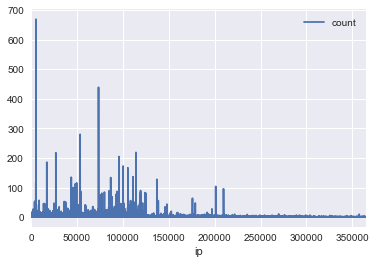

In [56]:
train_sample_ip_count.plot.line('ip' , 'count')